# UTSA CS 3793: Assignment-1

**Garcia - Jeremiah - (lnm248)**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**.
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(45 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [71]:
# Add only your imports here
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image

In [72]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"


In [73]:
# Load the graph data from the files
def load_cities(filename):
    cities = pd.read_csv(filename, header=None, names=['City', 'Latitude', 'Longitude'])
    # print("Cities Data:")
    # print(cities.head())  # Display the first few rows of the cities dataframe
    return cities

def load_distances(filename):
    distances = pd.read_csv(filename, header=None, names=['City1', 'City2', 'Distance'])
    # print("Distances Data:")
    # print(distances.head())  # Display the first few rows of the distances dataframe
    return distances

cities_df = load_cities(basePath + 'cities.csv')
distances_df = load_distances(basePath + 'distances.csv')

# cities_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/cities.csv', names=['City', 'Latitude', 'Longitude'])
# distances_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/distances.csv', names=['City1', 'City2', 'Distance'])

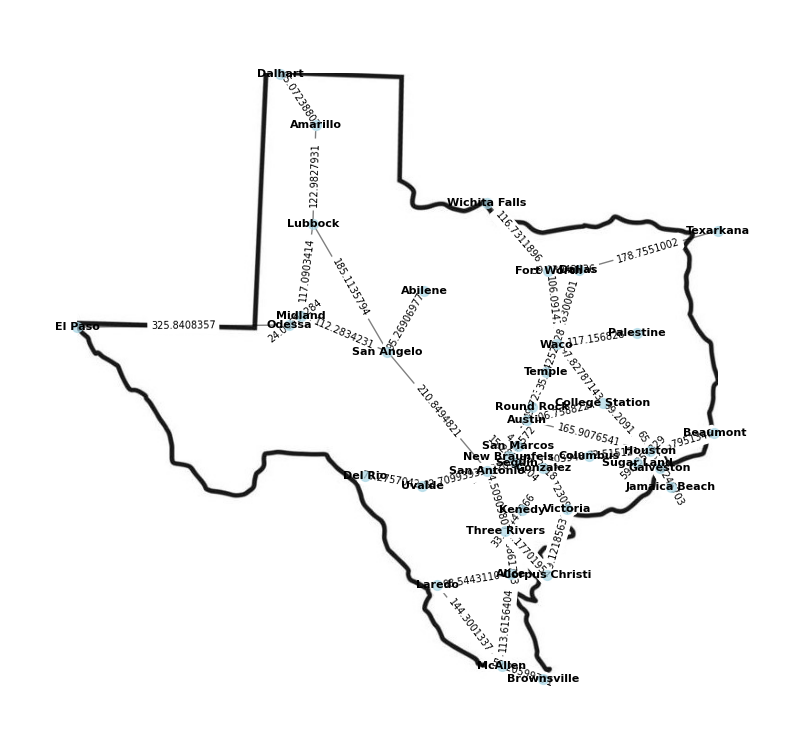

In [74]:
# Function to create a graph from the dataframes
def create_graph(cities_df, distances_df):
    G = nx.Graph()
    for index, row in cities_df.iterrows():
        # Convert the coordinates to float and make sure the sign is ignored as per the assignment description
        G.add_node(row['City'], pos=(abs(row['Longitude']), abs(row['Latitude'])))

    for index, row in distances_df.iterrows():
        G.add_edge(row['City1'], row['City2'], weight=row['Distance'])

    return G

# Creating the graph using the loaded data
G = create_graph(cities_df, distances_df)

# Load the Texas map image
updated_texas_map_path = '/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/map.jpg'
updated_texas_map = Image.open(updated_texas_map_path)

# Determine the size of the new image to scale our graph coordinates accordingly
image_width, image_height = updated_texas_map.size

# Normalize and flip graph coordinates to fit the image size
lon_min, lon_max = cities_df['Longitude'].abs().min(), cities_df['Longitude'].abs().max()
lat_min, lat_max = cities_df['Latitude'].abs().min(), cities_df['Latitude'].abs().max()

# Adjust the normalization function to flip the graph horizontally
def normalize_coordinates_flip(lon, lat, image_width, image_height, lon_min, lon_max, lat_min, lat_max):
    x = image_width - (lon - lon_min) / (lon_max - lon_min) * image_width
    y = image_height - (lat - lat_min) / (lat_max - lat_min) * image_height
    return x, y

# Apply the normalization and flipping to the graph positions
pos_flipped = {city: normalize_coordinates_flip(data['pos'][0], data['pos'][1], image_width, image_height,
                                                 lon_min, lon_max, lat_min, lat_max)
               for city, data in G.nodes(data=True)}

# Overlay the graph on the updated map, with the positions flipped
plt.figure(figsize=(10, 10))
plt.imshow(updated_texas_map)
nx.draw_networkx_nodes(G, pos_flipped, node_size=50, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos_flipped, width=1, alpha=0.5)
nx.draw_networkx_labels(G, pos_flipped, font_size=8, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos_flipped, edge_labels=edge_labels, font_size=7)
plt.axis('off')  # Turn off the axis
plt.show()

#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

Path of virus spread:
['Three Rivers', 'San Antonio', 'Corpus Christi', 'Alice', 'Kenedy', 'San Angelo', 'New Braunfels', 'Seguin', 'Uvalde', 'Victoria', 'Laredo', 'McAllen', 'Midland', 'Lubbock', 'Abilene', 'San Marcos', 'Gonzalez', 'Columbus', 'Del Rio', 'Brownsville', 'Odessa', 'Amarillo', 'Austin', 'Houston', 'El Paso', 'Dalhart', 'Round Rock', 'College Station', 'Beaumont', 'Galveston', 'Sugar Land', 'Temple', 'Waco', 'Jamaica Beach', 'Palestine', 'Fort Worth', 'Dallas', 'Wichita Falls', 'Texarkana']

Total distance travelled by the virus:
3354.31992298


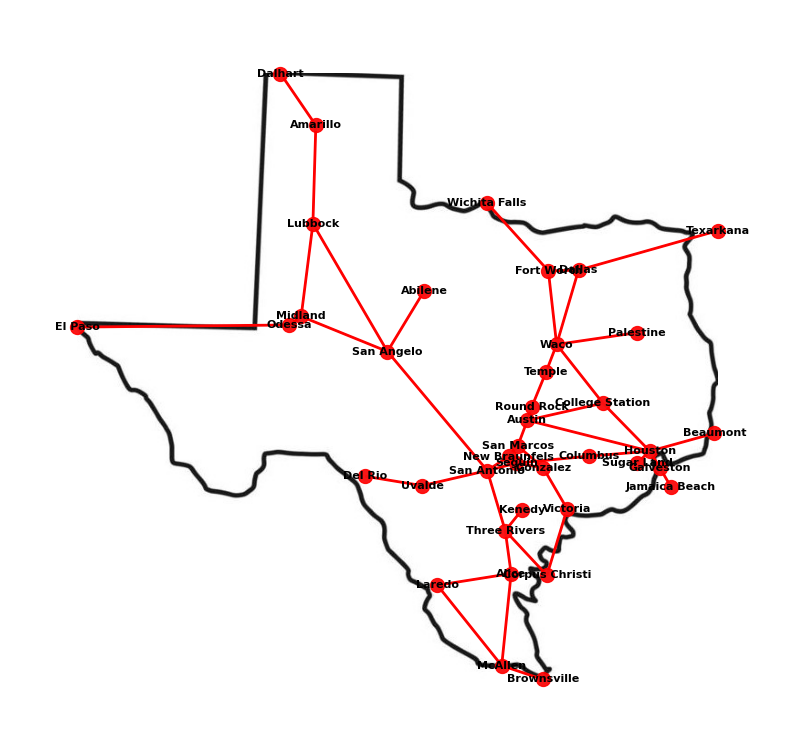

In [75]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
# Define a function to perform an uninformed search (Breadth-First Search) from the starting city
def bfs_search(graph, start_city):
    visited = {city: False for city in graph.nodes()}
    distance = {city: None for city in graph.nodes()}
    path = []
    total_distance = 0
    queue = [start_city]
    visited[start_city] = True
    distance[start_city] = 0

    while queue:
        city = queue.pop(0)
        path.append(city)

        for neighbor in graph.neighbors(city):
            if not visited[neighbor]:
                visited[neighbor] = True
                queue.append(neighbor)
                distance[neighbor] = distance[city] + graph[city][neighbor]['weight']
                total_distance += graph[city][neighbor]['weight']

    return path, total_distance

# Perform the search starting from 'Three Rivers'
search_path, search_distance = bfs_search(G, 'Three Rivers')

# Print the path and total distance
print("Path of virus spread:")
print(search_path)
print("\nTotal distance travelled by the virus:")
print(search_distance)

# Overlay the path on the Texas map along with the cities visited for extra credit
# Get the positions of the cities in the search path
search_pos = {city: pos_flipped[city] for city in search_path if city in pos_flipped}

# Draw the path on the map
plt.figure(figsize=(10, 10))
plt.imshow(updated_texas_map)
nx.draw_networkx_nodes(G, pos_flipped, node_size=50, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos_flipped, width=1, alpha=0.5)
nx.draw_networkx_labels(G, pos_flipped, font_size=8, font_weight='bold')

# Highlight the search path
nx.draw_networkx_nodes(G, search_pos, node_size=100, node_color='red', alpha=0.9)
nx.draw_networkx_edges(G, pos_flipped, edgelist=nx.edges(G, search_path), width=2, edge_color='red')

plt.axis('off')  # Turn off the axis
plt.show()


#Vaccine Transportation - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

Vaccine Transportation Path:
['San Antonio', 'New Braunfels', 'San Marcos', 'Austin', 'College Station']

Total distance travelled for vaccine transportation:
186.77450141


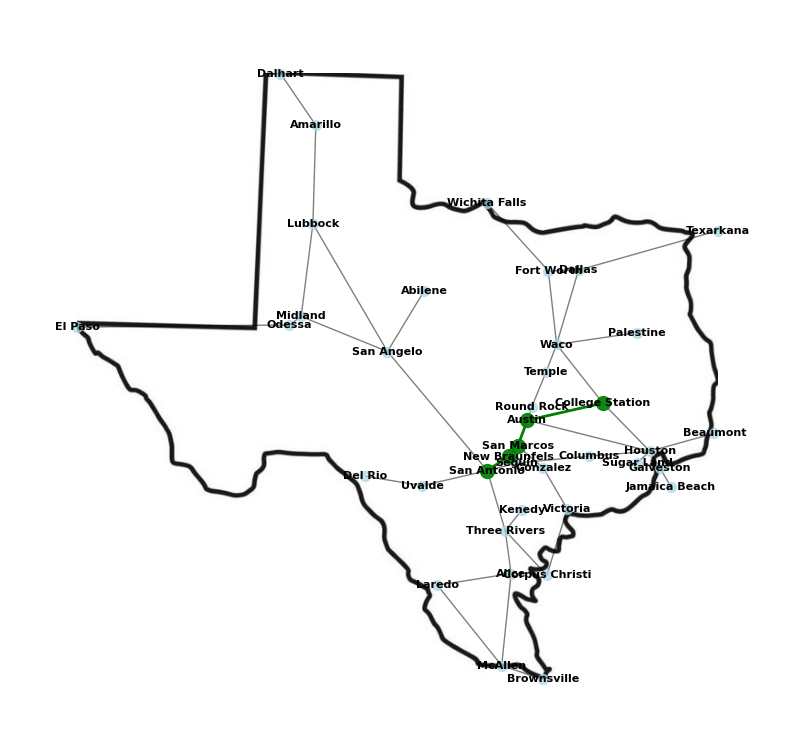

In [76]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'
import math

# Define the heuristic function: straight-line distance between two points
def heuristic(city1, city2, cities_df):
    lat1, lon1 = cities_df[cities_df['City'] == city1][['Latitude', 'Longitude']].values[0]
    lat2, lon2 = cities_df[cities_df['City'] == city2][['Latitude', 'Longitude']].values[0]
    return math.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

# Define the A* search function
def a_star_search(graph, start, goal, cities_df):
    open_set = set([start])
    closed_set = set()
    g = {city: float('inf') for city in graph.nodes()}
    g[start] = 0
    f = {city: float('inf') for city in graph.nodes()}
    f[start] = heuristic(start, goal, cities_df)
    came_from = {city: None for city in graph.nodes()}

    while open_set:
        current = min(open_set, key=lambda city: f[city])
        if current == goal:
            break

        open_set.remove(current)
        closed_set.add(current)

        for neighbor in graph.neighbors(current):
            if neighbor in closed_set:
                continue
            tentative_g_score = g[current] + graph[current][neighbor]['weight']

            if neighbor not in open_set:
                open_set.add(neighbor)
            elif tentative_g_score >= g[neighbor]:
                continue

            came_from[neighbor] = current
            g[neighbor] = tentative_g_score
            f[neighbor] = g[neighbor] + heuristic(neighbor, goal, cities_df)

    # Reconstruct path
    path = []
    total_distance = 0
    while current:
        path.append(current)
        next_node = came_from[current]
        if next_node:
            total_distance += graph[current][next_node]['weight']
        current = next_node
    path.reverse()

    return path, total_distance

# Perform A* search from San Antonio to College Station
vaccine_path, vaccine_distance = a_star_search(G, 'San Antonio', 'College Station', cities_df)

# Print the path and total distance
print("Vaccine Transportation Path:")
print(vaccine_path)
print("\nTotal distance travelled for vaccine transportation:")
print(vaccine_distance)

# Overlay the vaccine transportation path on the Texas map along with the cities visited
# Get the positions of the cities in the vaccine transportation path
vaccine_pos = {city: pos_flipped[city] for city in vaccine_path if city in pos_flipped}

# Draw the vaccine transportation path on the map
plt.figure(figsize=(10, 10))
plt.imshow(updated_texas_map)

# Draw all nodes and edges first
nx.draw_networkx_nodes(G, pos_flipped, node_size=50, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos_flipped, width=1, alpha=0.5)
nx.draw_networkx_labels(G, pos_flipped, font_size=8, font_weight='bold')

# Then highlight only the nodes and edges on the vaccine transportation path
vaccine_path_edges = list(zip(vaccine_path, vaccine_path[1:]))  # Create pairs of path nodes for edges
nx.draw_networkx_nodes(G, pos_flipped, nodelist=vaccine_path, node_size=100, node_color='green', alpha=0.9)
nx.draw_networkx_edges(G, pos_flipped, edgelist=vaccine_path_edges, width=2, edge_color='green')

plt.axis('off')  # Turn off the axis
plt.show()

#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (45 points) Reading Data files & Creating a 2D Graph
*   (40 points) Virus Spread - Uninformed Search Agent
*   (40 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



